In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape


(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
import seaborn as sns


/home/sherlocked/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

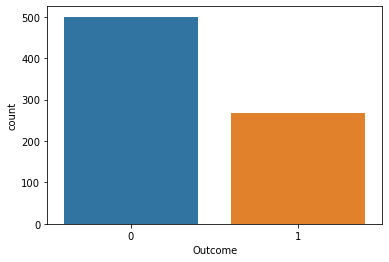

In [9]:
sns.countplot(df['Outcome'],label = 'Count')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

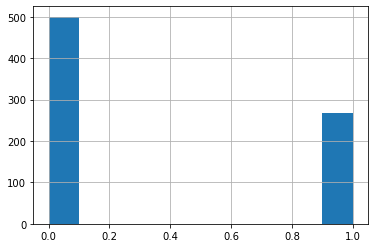

In [12]:
df['Outcome'].hist()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
X = df.iloc[:,:8]
y = df['Outcome']

In [28]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [29]:
y.shape

(768,)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 42)

In [31]:
dt = DecisionTreeClassifier(max_depth = 3,random_state = 42)


In [32]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
pred = dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
print(accuracy_score(y_test,pred))

0.7272727272727273


In [42]:
print(confusion_matrix(y_test,pred))

[[129  21]
 [ 42  39]]


In [43]:
print(dt.feature_importances_)

[0.         0.65129896 0.         0.         0.         0.23873879
 0.         0.10996225]


(-1.0, 8.0)

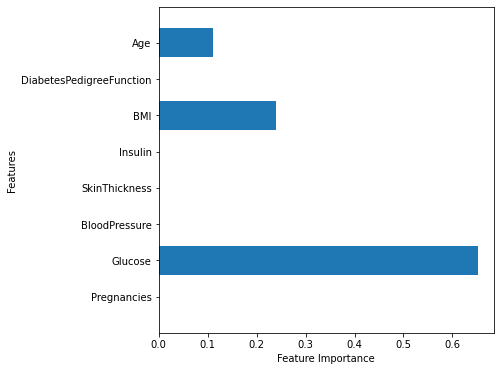

In [47]:
plt.figure(figsize = (6,6))
n_features = 8
plt.barh(range(n_features),dt.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.ylim(-1,n_features)


Using KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier


In [64]:
train_acc =[]
test_acc = []
no_of_neighbors = range(1,11)


In [65]:
for n_neighbors in no_of_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    
    #train_accuracy
    train_acc.append(knn.score(X_train,y_train))
    #test_accuracy
    test_acc.append(knn.score(X_test,y_test))
    


In [66]:
train_acc

[1.0,
 0.8417132216014898,
 0.8584729981378026,
 0.8212290502793296,
 0.8063314711359404,
 0.7895716945996276,
 0.7914338919925512,
 0.7728119180633147,
 0.7932960893854749,
 0.7802607076350093]

In [67]:
test_acc

[0.6666666666666666,
 0.70995670995671,
 0.7056277056277056,
 0.7272727272727273,
 0.7186147186147186,
 0.70995670995671,
 0.7402597402597403,
 0.7359307359307359,
 0.7229437229437229,
 0.70995670995671]

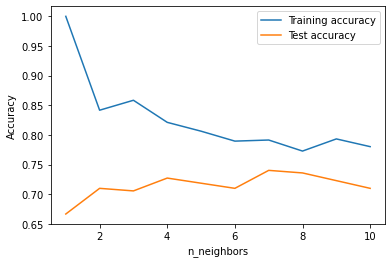

In [68]:
plt.plot(no_of_neighbors,train_acc,label = 'Training accuracy')
plt.plot(no_of_neighbors,test_acc,label = 'Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')

plt.legend()

In [69]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=8)

In [70]:
y_pred = knn.predict(X_test)

In [71]:
print(accuracy_score(y_test,y_pred))

0.7359307359307359


In [72]:
print(confusion_matrix(y_test,y_pred))

[[131  19]
 [ 42  39]]


Deep learning method

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [82]:
mlp = MLPClassifier(max_iter = 500,alpha = 1,random_state = 42)
mlp.fit(X_train_scaled,y_train)

MLPClassifier(alpha=1, max_iter=500, random_state=42)

In [83]:
print("Accuracy on train set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))

Accuracy on train set: 0.829


In [84]:
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on test set: 0.740


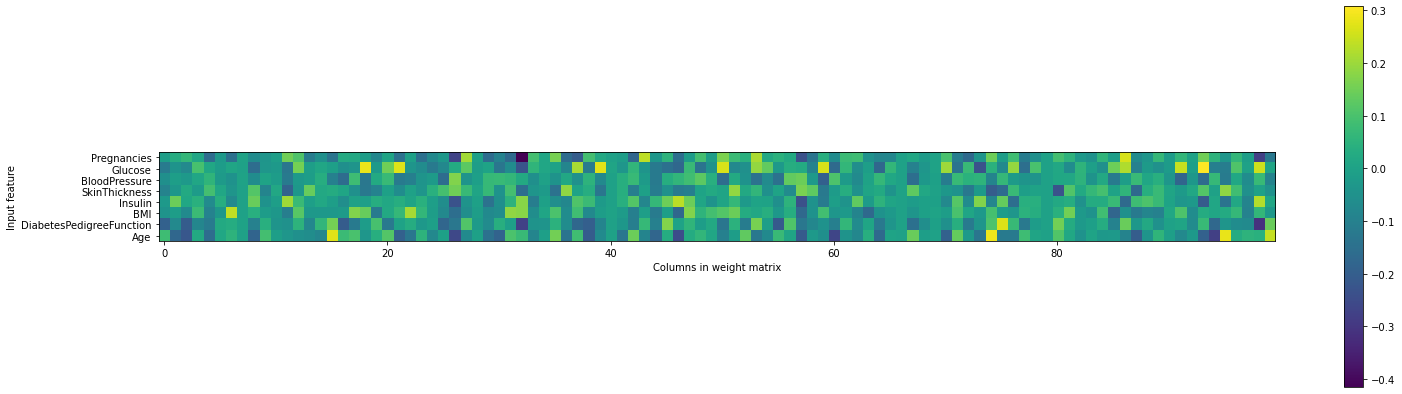

In [94]:
plt.figure(figsize=(25, 7))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), X.columns)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()